In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [10]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\Kaggle\digit\digit-recognizer\train.csv')

In [20]:
images = data.iloc[:,1:].values
images = images.astype(np.float)
images = np.multiply(images,1.0/255)
labels = data.iloc[:,0].values

In [29]:
images_size = images.shape[1]
image_width = image_height = np.ceil(np.sqrt(images_size)).astype(np.uint8)

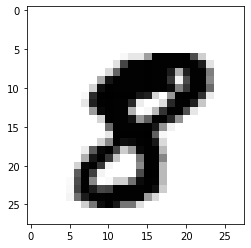

In [32]:
def display(img):
    one_image = img.reshape(image_width,image_height)
    plt.imshow(one_image,cmap=cm.binary)
display(images[10])

In [33]:
# 统计标签种类
labels_flat = data.iloc[:,0].values
labels_count = np.unique(labels_flat).shape[0]

In [39]:
def dense_to_one_hot(labels_dense, num_classes):
    #arg1：标签数组   arg2:去重标签数组
    num_labels = labels_dense.shape[0]
    #统计标签数量
    index_offset = np.arange(num_labels) * num_classes
    #确定大小
    labels_one_hot = np.zeros((num_labels, num_classes))
    #初始化0矩阵(42000X10)
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    #完成赋值
    return labels_one_hot

labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

In [40]:
labels

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)